In [1]:
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#импорт файла
data = pd.read_csv('covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [7]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [5]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
data['Province/State'].fillna('Not Specified', inplace=True)

In [9]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

* Данные содержат информацию о заболеваемости COVID-19 с
разбивкой по датам, регионам и странам.
*Пропущенные значения в столбце 'Провинция/штат' заполненили значением 'Не указано'.


In [10]:
# Преобразование столбца даты в формат datetime
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

# Удаление лишних столбцов
data.drop(columns=['SNo', 'Last Update'], inplace=True)

In [11]:
data.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

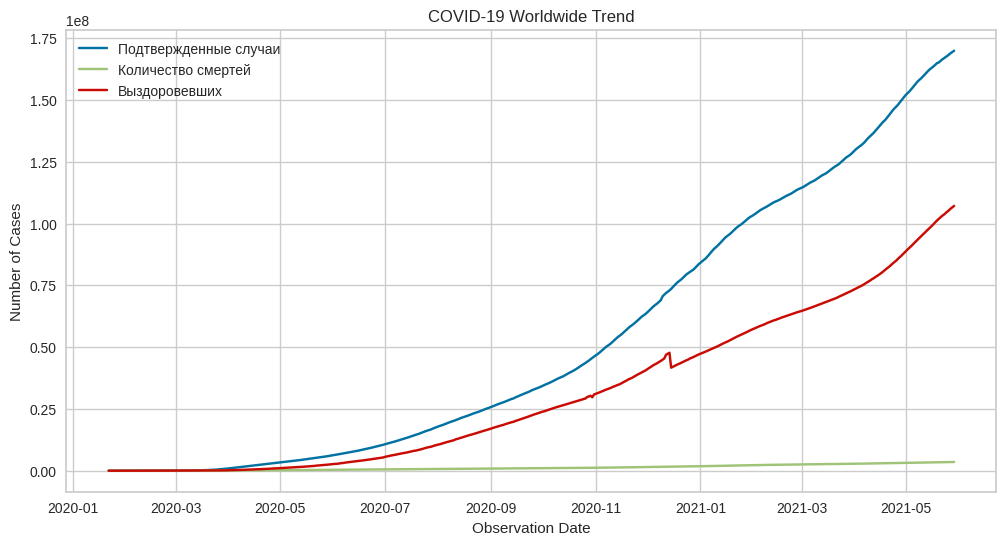

In [12]:
#анализ данных
# Группировка данных по дате и суммирование случаев
time_series = data.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(time_series['ObservationDate'], time_series['Confirmed'], label='Подтвержденные случаи')
plt.plot(time_series['ObservationDate'], time_series['Deaths'], label='Количество смертей')
plt.plot(time_series['ObservationDate'], time_series['Recovered'], label='Выздоровевших')

plt.xlabel('Observation Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Worldwide Trend')
plt.legend()
plt.show()

График показывает общую динамику подтвержденных случаев, смертей и выздоровлений по всему миру.

*   **Подтвержденные случаи**: Быстрое и устойчивое увеличение указывает на распространение вируса.
* **Выздоровления**: Тоже увеличиваются, но с некоторым запаздыванием по сравнению с подтвержденными случаями, что отражает время, необходимое для выздоровления.
* **Смерти**: Рост более пологий, что может указывать на различные факторы, включая медицинские вмешательства и эффективность лечения

In [20]:
# Топ-10 стран по количеству подтвержденных случаев
top_countries = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10).reset_index()

top_countries

,Country/Region,Confirmed
0,France,5863138.0
1,India,5713215.0
2,Turkey,5235978.0
3,UK,3910803.0
4,US,3788713.0
5,Argentina,3732263.0
6,Brazil,3254893.0
7,Iran,2893218.0
8,Poland,2871371.0
9,Indonesia,1809926.0


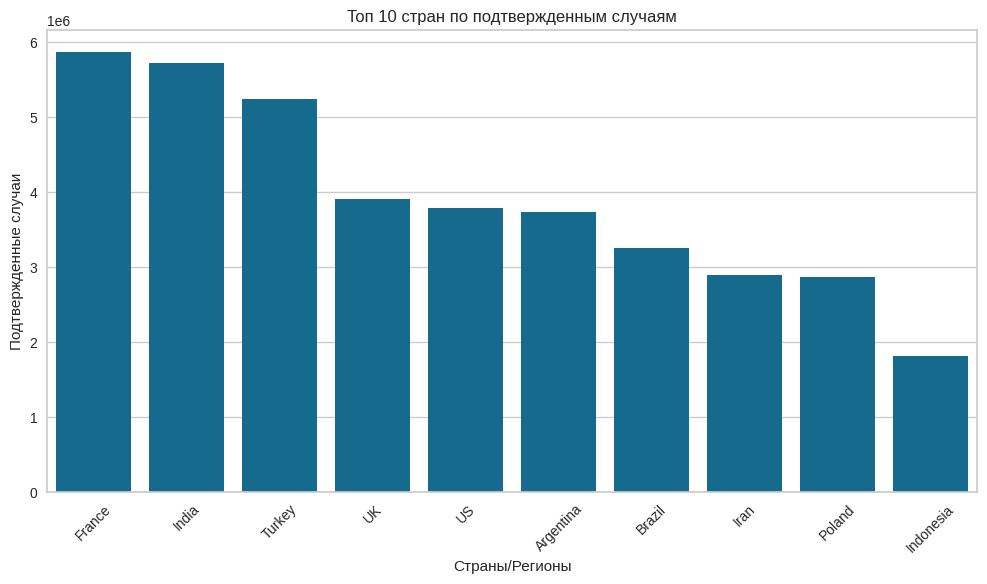

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries['Country/Region'], y=top_countries['Confirmed'])
plt.xlabel('Страны/Регионы')
plt.ylabel('Подтвержденные случаи')
plt.title('Toп 10 стран по подтвержденным случаям')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Топ-10 стран по количеству выздоровевших
top_recovered = data.groupby('Country/Region')['Recovered'].max().sort_values(ascending=False).head(10).reset_index()

top_recovered

,Country/Region,Recovered
0,US,6399531.0
1,India,5339838.0
2,Turkey,5094279.0
3,Argentina,3288467.0
4,Brazil,2895697.0
5,Poland,2636675.0
6,Iran,2425033.0
7,Mexico,1924865.0
8,Peru,1897522.0
9,Indonesia,1659974.0


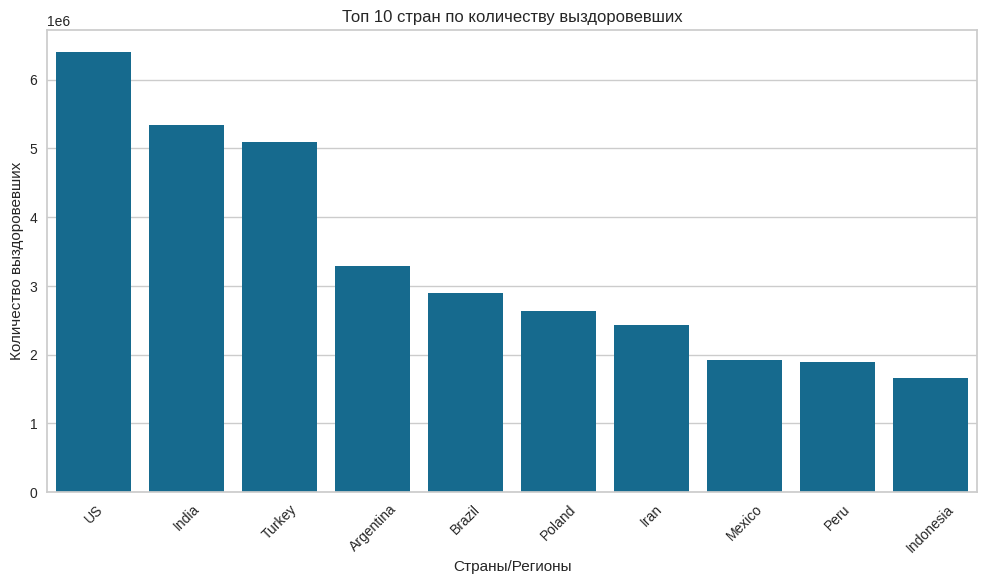

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_recovered['Country/Region'], y=top_recovered['Recovered'])
plt.xlabel('Страны/Регионы')
plt.ylabel('Количество выздоровевших')
plt.title('Топ 10 стран по количеству выздоровевших')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Топ-10 стран по количеству смертей
top_deaths = data.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(10).reset_index()

top_deaths

,Country/Region,Deaths
0,UK,112385.0
1,Brazil,111123.0
2,France,108532.0
3,India,94030.0
4,Iran,79741.0
5,Argentina,77108.0
6,Poland,73682.0
7,US,63236.0
8,South Africa,56363.0
9,Indonesia,50262.0


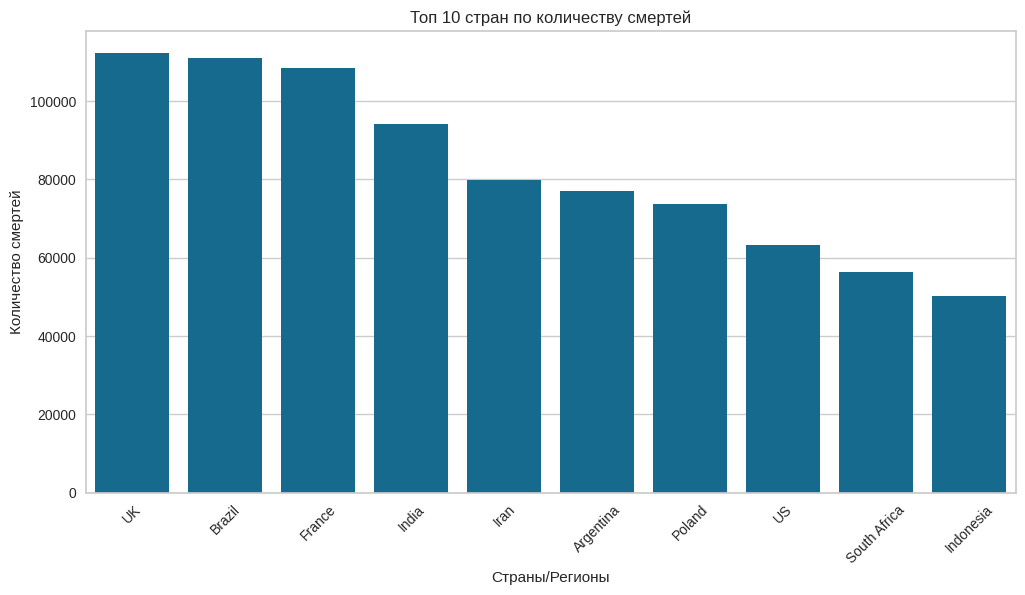

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_deaths['Country/Region'], y=top_deaths['Deaths'])
plt.xlabel('Страны/Регионы')
plt.ylabel('Количество смертей')
plt.title('Топ 10 стран по количеству смертей')
plt.xticks(rotation=45)
plt.show()

**Подтвержденные случаи**: График показывает, какие страны имели наибольшее количество подтвержденных случаев на момент анализа.
**Количество выздоровлений**: График демонстрирует, в каких странах больше всего выздоровевших, что может быть показателем эффективности лечения и медицинской системы.
**Количество смертей**: График показывает страны с наибольшим количеством смертей, что может указывать на тяжесть вспышки в этих странах и возможные проблемы в медицинской инфраструктуре.

In [29]:
grouped_data = data.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()

grouped_data

,ObservationDate,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,China,Unknown,0.0,0.0,0.0
1,2020-01-22,Hong Kong,Hong Kong,0.0,0.0,0.0
2,2020-01-22,Japan,Not Specified,2.0,0.0,0.0
3,2020-01-22,Kiribati,Not Specified,0.0,0.0,0.0
4,2020-01-22,Macau,Macau,1.0,0.0,0.0
...,...,...,...,...,...,...
87276,2021-05-29,Vietnam,Not Specified,6908.0,47.0,2896.0
87277,2021-05-29,West Bank and Gaza,Not Specified,307838.0,3492.0,300524.0
87278,2021-05-29,Yemen,Not Specified,6731.0,1319.0,3399.0
87279,2021-05-29,Zambia,Not Specified,94751.0,1276.0,91594.0


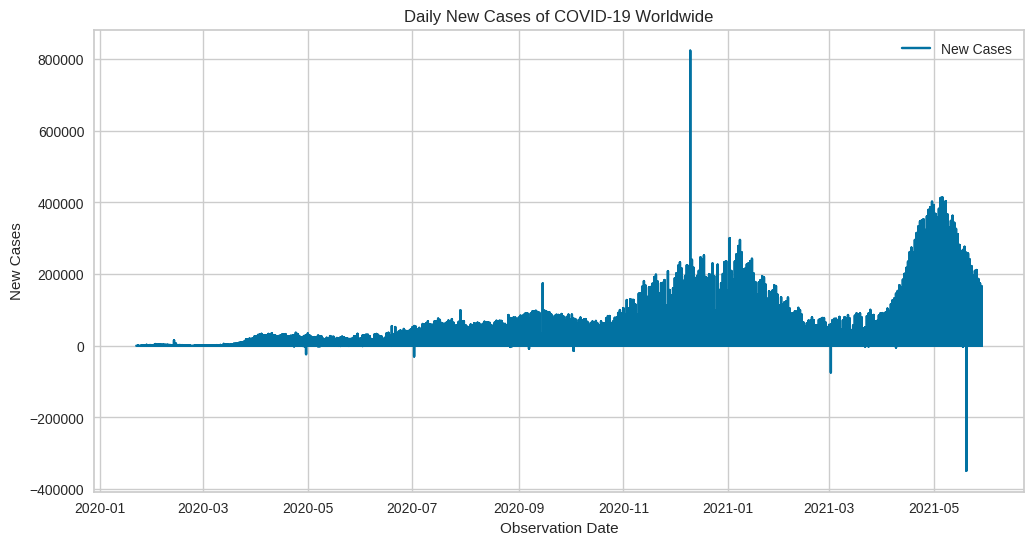

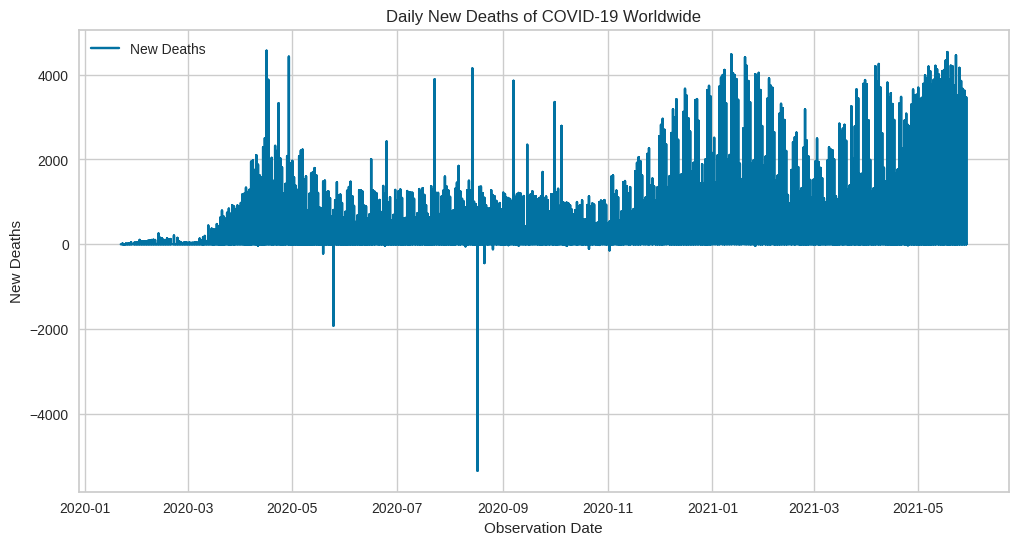

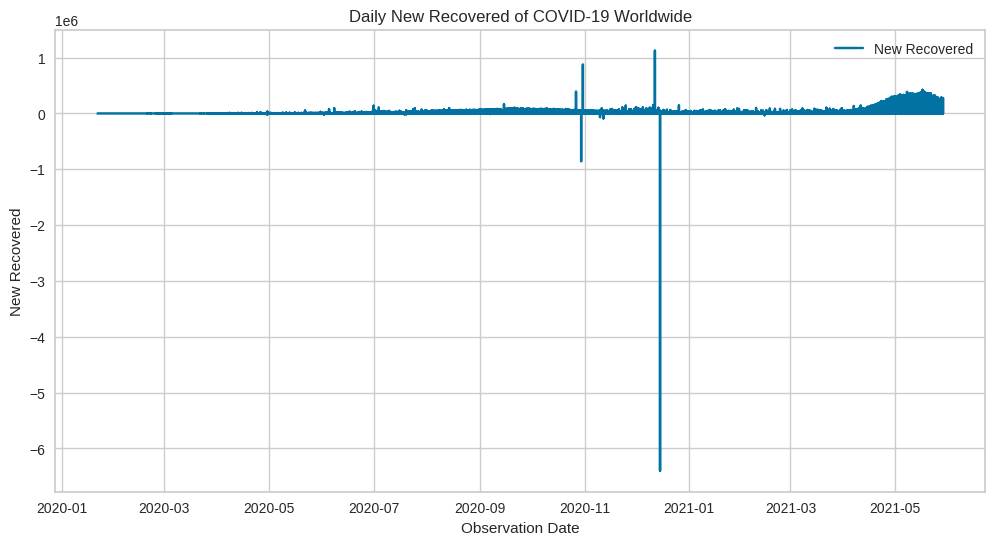

In [30]:
# Создание новых признаков: новых случаев, новых смертей и новых выздоровлений
grouped_data['New Cases'] = grouped_data.groupby('Country/Region')['Confirmed'].diff().fillna(0)
grouped_data['New Deaths'] = grouped_data.groupby('Country/Region')['Deaths'].diff().fillna(0)
grouped_data['New Recovered'] = grouped_data.groupby('Country/Region')['Recovered'].diff().fillna(0)

# Удаление первых строк с NaN значениями, которые появились из-за diff()
grouped_data.dropna(inplace=True)

# Анализ новых случаев по времени
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['ObservationDate'], grouped_data['New Cases'], label='New Cases')
plt.xlabel('Observation Date')
plt.ylabel('New Cases')
plt.title('Daily New Cases of COVID-19 Worldwide')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data['ObservationDate'], grouped_data['New Deaths'], label='New Deaths')
plt.xlabel('Observation Date')
plt.ylabel('New Deaths')
plt.title('Daily New Deaths of COVID-19 Worldwide')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data['ObservationDate'], grouped_data['New Recovered'], label='New Recovered')
plt.xlabel('Observation Date')
plt.ylabel('New Recovered')
plt.title('Daily New Recovered of COVID-19 Worldwide')
plt.legend()
plt.show()


# Перейдем к построению моделям машиного обучения



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
features = ['New Cases', 'New Deaths', 'New Recovered']
target = 'New Cases'

def create_sequences(data, length):
  X, y = [], []
  for i in range(len(data) - length):
    X.append(data[i:i + length])
    y.append(data[i + length])
  return np.array(X), np.array(y)

length = 14
X, y = create_sequences(grouped_data[features].values, length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Линейная регрессия

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr)}')

MSE: 85667210.39470744
MAE: 1705.3704619563475


# Дерево решений

In [37]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred_tr = tree_reg.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_tr)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_tr)}')

MSE: 854678530.0054479
MAE: 880.9536909718244


# Случайный лес

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf)}')

# Линейная нейронная сеть

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

Epoch [100/1000], Train Loss: 25487124480.0000, Validation Loss: 24569724928.0000
Epoch [200/1000], Train Loss: 25038827520.0000, Validation Loss: 24181090304.0000
Epoch [300/1000], Train Loss: 24784988160.0000, Validation Loss: 23967428608.0000
Epoch [400/1000], Train Loss: 24622956544.0000, Validation Loss: 23835465728.0000
Epoch [500/1000], Train Loss: 24519215104.0000, Validation Loss: 23754473472.0000
Epoch [600/1000], Train Loss: 24452786176.0000, Validation Loss: 23705403392.0000
Epoch [700/1000], Train Loss: 24410253312.0000, Validation Loss: 23676221440.0000
Epoch [800/1000], Train Loss: 24383019008.0000, Validation Loss: 23659323392.0000
Epoch [900/1000], Train Loss: 24365578240.0000, Validation Loss: 23649931264.0000
Epoch [1000/1000], Train Loss: 24354412544.0000, Validation Loss: 23645065216.0000


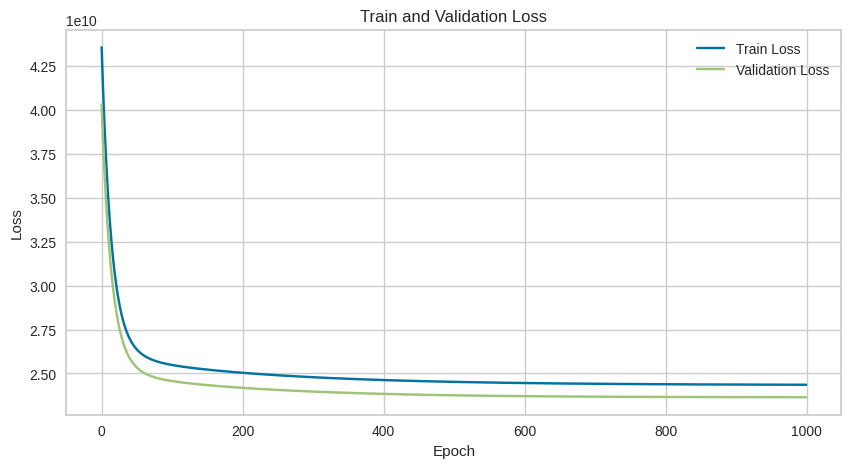

In [15]:
X = data[['Confirmed', 'Deaths']]
y = data['Recovered']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


num_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()

    # Прямой проход
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())

    # Обратный проход и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()